In [51]:
import sys
!(sys.executable) -m 

/bin/bash: -c: line 0: syntax error near unexpected token `-m'
/bin/bash: -c: line 0: `(sys.executable) -m pip install xgboost"'


In [52]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, roc_curve

### Reading data

In [9]:
df_train = pd.read_csv('./dataset/train.csv')
df_val = pd.read_csv('./dataset/validation.csv')
df_test = pd.read_csv('./dataset/test_samples_only.csv')

In [24]:
X_train = df_train["url"]
X_val = df_val["url"]

In [25]:
y_train = df_train["label"]
y_val = df_val["label"]

### Data Preprocessing

In [26]:
# Extract features from the URLs using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)


## Random Forest classifier

In [84]:
# Train a random forest classifier on the training data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [85]:
# Make predictions on the testing data and evaluate the performance
y_pred = rf_classifier.predict(X_val_tfidf)

In [86]:
accuracy = accuracy_score(y_val, y_pred)
confusion_mat = confusion_matrix(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion matrix: {confusion_mat}")

Accuracy: 0.9789267336437147
Confusion matrix: [[3126   83]
 [   3  869]]


In [87]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3209
           1       0.91      1.00      0.95       872

    accuracy                           0.98      4081
   macro avg       0.96      0.99      0.97      4081
weighted avg       0.98      0.98      0.98      4081



In [88]:
f1_score(y_val, y_pred, average='macro')

0.9696409639988264

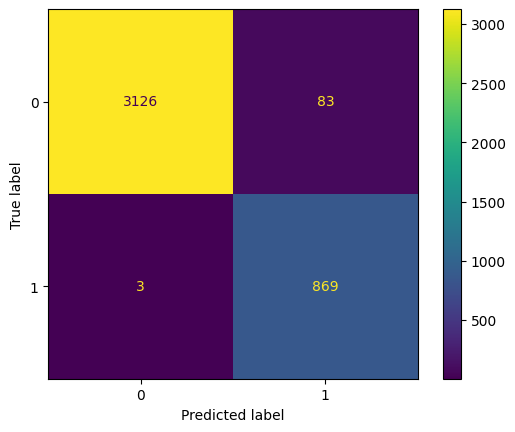

In [89]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=rf_classifier.classes_)
disp.plot()
plt.show()

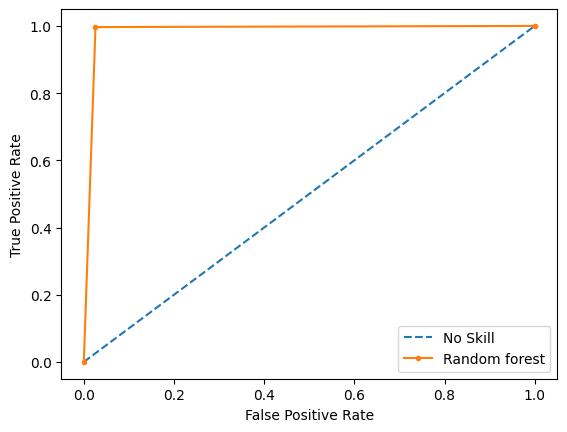

In [90]:
random_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, random_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [94]:
X_test = df_test["url"]
X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred = rf_classifier.predict(X_test_tfidf)

In [100]:
df_result= pd.DataFrame(data = y_pred, 
                        columns = ["label"])
df_result.to_csv("submission.csv", index=False)

### Problem statement: Find out benign and phishing url.
### Dataset provided to us had two columns url (string) and label (numeric)
### For data preprocessing we converted the url into tf-idf vector using TfidfVectorizer() function from sklearn.
### Tf idf is a very powerful tool when it comes to information retrieval (IR) 

### For modeling, we used Random Forest an ensemble model. 
### Reason behind using Random forest are as follows: 
### Accuracy of Random forest is generally very high.
### Its efficiency is particularly Notable in Large Data sets.
### Provides an estimate of important variables in classification.
### Forests Generated can be saved and reused.
### Unlike other models It does not overfit with more features.

### Results when tested on validation dataset: 
### Accuracy: 97.89
### F1 macros: 96.96

### In our case since we have to find the phising email
### the recall of our model is 1 which means the number of instances which the model correctly identified as phishing email
### out of the total email is prefect 
### Also the precision is very good as well 91 precent of  positive identifications of phishing  was actually correct.

### Since we have to prevent phising we can give more value to recall over precision. 